## Data Analytics Project 1
#### UCI Online Retail Transaction Analytics
##### Meenakshi Sharadha A  

**Summary:**  
In this project, I analyze the UCI Online Retail transactional dataset using Python and key libraries including pandas, matplotlib, and seaborn. The primary goal is to uncover actionable business insights on customer purchase behavior, revenue drivers, product performance, and retention patterns for an online retailer operating from 2010 to 2011. Through systematic data cleaning, exploratory analysis, customer segmentation, and cohort analysis, I aim to demonstrate a complete analytics workflow that answers critical business questions and supports data-driven strategy.

**Executive Summary:**
- Cleaned and validated over 540,000 online retail transactions from the UCI dataset.
- Identified key revenue drivers, product performance, and international sales trends.
- Segmented customers using RFM analysis, identified VIPs, and tracked purchase behavior over time.
- Revealed strong seasonality and retention challenges with actionable marketing opportunities.
- Generated clear, practical recommendations to boost sales and customer loyalty.

In [65]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# load dataset
file_path = r"C:\Users\ameen\Desktop\PORTFOLIO\Online_Retail.xlsx"
df= pd.read_excel(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [67]:
# Data Inspection
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Data Quality and Cleaning Notes

- Approximately 25% of transaction records lack a CustomerID, which limits the depth of customer-level segmentation and retention analyses.
- Some product Description values are missing, which may impact the completeness of certain product-level insights.
- Statistical summaries of Quantity and UnitPrice revealed extreme minimum and maximum values and high standard deviations, pointing to the presence of outliers in the dataset.
- Outliers and negative values were systematically removed to ensure the integrity and reliability of all subsequent analyses.
- All major columns required for time series, product, and country-level analysis are complete after cleaning.


### Anomaly and Outlier Detection

Text(0.5, 1.0, 'Distribution of Quantity')

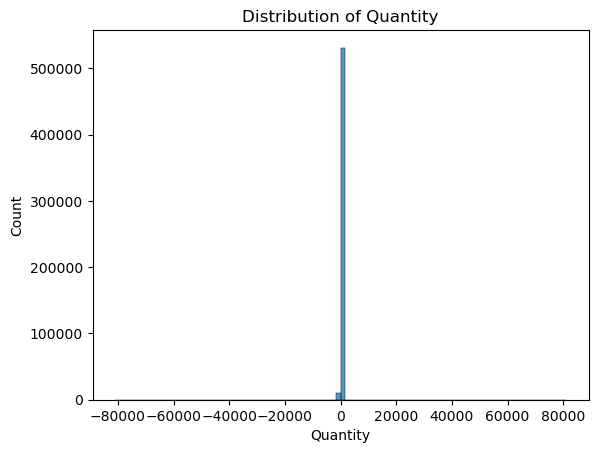

In [68]:
# Visualising the attribute UnitPrice to view outliers
sns.histplot(df['Quantity'], bins=100, kde=False)
plt.title("Distribution of Quantity")
# plt.xlim(-200, 200)  # Limit x-axis to the main range of values

<Axes: xlabel='UnitPrice', ylabel='Count'>

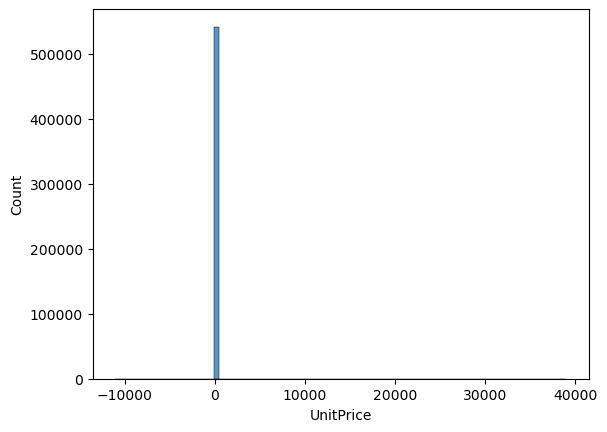

In [69]:
# Visualising Quantity attribute to view outliers

sns.histplot(df['UnitPrice'], bins=100, kde=False)

#### Clear visibility of extreme values (Outliers) in Quantity and Unit Price - Extremely Skewed. The presence of very large negative and positive values causes most of the histogram bins to be squeezed into the center, making the majority of data appear as a very tall, thin spike near zero. Nearly all orders have relatively low absolute quantities (1–10 units), which is why the central bar is so much higher than anything else.

In [70]:
# Calculate IQR on Quantity
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)

iqr = q3-q1

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr


df_clean= df[(df['Quantity']>=lower_bound) & (df['Quantity']<=upper_bound)]

In [71]:
print(f"Rows before filtering: {len(df)}")
print(f"Rows after filtering: {len(df_clean)}")
print(f"Rows removed: {len(df_clean)/len(df)*100}")

Rows before filtering: 541909
Rows after filtering: 483290
Rows removed: 89.18287018669187


#### By following the IQR method of removing outliers, 11% of the data in the dataset has been removed - extreme outliers. The same will be followed for Unit Price

Text(0.5, 1.0, 'Distribution of Quantity')

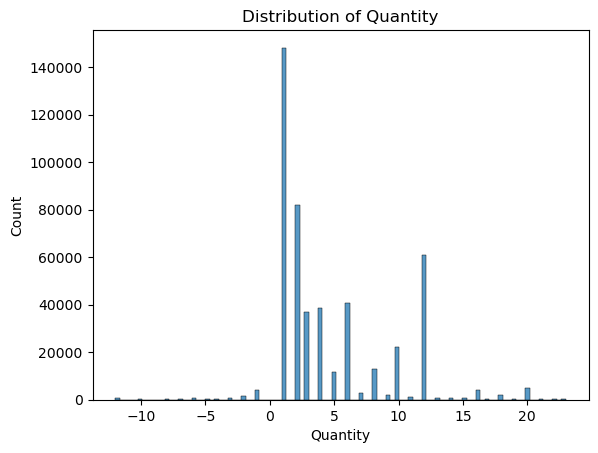

In [72]:
# Visualising the attribute UnitPrice to view outliers
sns.histplot(df_clean['Quantity'], bins=100, kde=False)
plt.title("Distribution of Quantity")
# plt.xlim(-200, 200)  # Limit x-axis to the main range of values

In [73]:
df_priceclean = df_clean[df_clean['UnitPrice']>0]

#### First the items with entries of their price below 0 are removed as that is clearly a data error.

In [74]:
price_q1 = df_priceclean['UnitPrice'].quantile(0.25)
price_q3 = df_priceclean['UnitPrice'].quantile(0.75)

iqr = price_q3-price_q1
upper_bound = price_q3+1.5*iqr

df_cleaned = df_priceclean[df_priceclean['UnitPrice']<=upper_bound]

In [75]:
print(f"Upper bound for UnitPrice: {upper_bound}")
print(f"Rows before cleaning: {len(df_clean)}")
print(f"Rows after price cleaning: {len(df_cleaned)}")

Upper bound for UnitPrice: 8.5
Rows before cleaning: 483290
Rows after price cleaning: 449480


<Axes: xlabel='UnitPrice', ylabel='Count'>

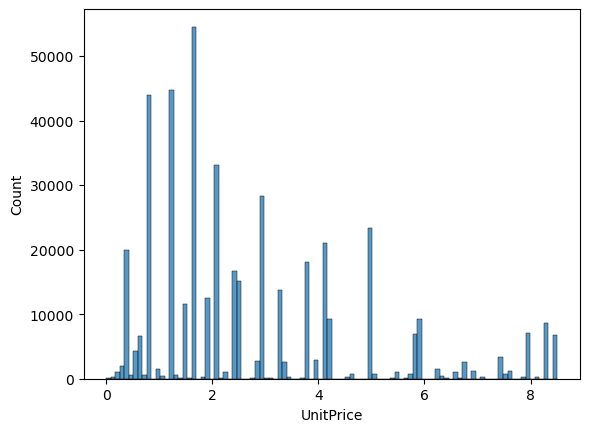

In [76]:
sns.histplot(df_cleaned['UnitPrice'], bins=100, kde=False)


#### After inspecting Quantity and UnitPrice distributions, I removed extreme outliers using the IQR rule. This step eliminated rare, unrealistic transactions (e.g., returns or entry errors), resulting in a dataset that more accurately reflects real customer orders. Visualizing the cleaned data shows a much more interpretable distribution, which improves the reliability of all further analysis.

## EDA

In [77]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [78]:
# Check number of unique customers, countries, products

print("No. of unique customers: ", df_cleaned['CustomerID'].nunique())
print("No. of unique countries: ", df_cleaned['Country'].nunique())
print("No. of unique products: ", df_cleaned['StockCode'].nunique())

No. of unique customers:  4206
No. of unique countries:  38
No. of unique products:  3710


### 1. Revenue Drivers by Country and Time

### Business Question “What are the main drivers of revenue—by time period (seasonality)?”

In [79]:
# Group by month-year
#.dt.to_period('M') will give month with the year
# .dt.year will give the month
# .dt.month will give the months but if many yeras are there, months will overlap
df_cleaned['Revenue']= df_cleaned['Quantity']* df_cleaned['UnitPrice']
monthly_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.to_period('M')).agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',   # number of unique orders
    'CustomerID': 'nunique'   # unique customers
}).reset_index()

monthly_sales['InvoiceDate'] = monthly_sales['InvoiceDate'].dt.to_timestamp()

monthly_sales.head()

C:\Users\ameen\AppData\Local\Temp\ipykernel_10276\1133154168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Revenue']= df_cleaned['Quantity']* df_cleaned['UnitPrice']


,InvoiceDate,Revenue,InvoiceNo,CustomerID
0,2010-12-01,364800.390,1636,875
1,2011-01-01,292840.870,1177,727
2,2011-02-01,249938.450,1146,731
3,2011-03-01,322094.100,1549,956
4,2011-04-01,257307.371,1295,828


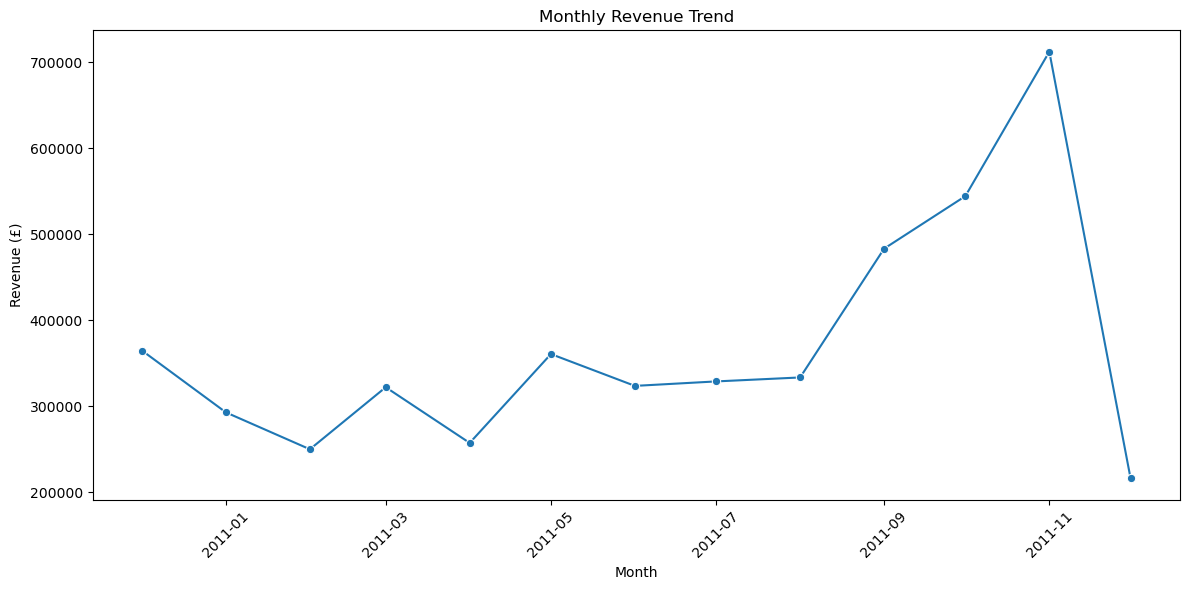

In [80]:
plt.figure(figsize=(12,6))
sns.lineplot(x='InvoiceDate', y='Revenue', data=monthly_sales, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Revenue Insight:
##### Revenue shows strong seasonality, spiking in December—the peak holiday period for this retailer. Additional increases are observed in March, which may correspond to promotion periods or seasonal campaigns. These patterns indicate that business planning, inventory stocking, and marketing spend should be tightly aligned to forecasted demand peaks and cycles, especially around the year-end. Understanding these trends allows the company to maximize sales during high-traffic periods and proactively address slow months.


### Business Question "Which countries contribute the most to revenue for the online retailer during 2010–2011?"

In [81]:
countryrev = df_cleaned.groupby('Country').agg({
    'Revenue':'sum',
    'CustomerID':'nunique'
}).reset_index()
countryrev = countryrev.sort_values(by='Revenue', ascending = False)

Text(0.5, 1.0, 'Top 10 Countries by Total Revenue (2010–2011)')

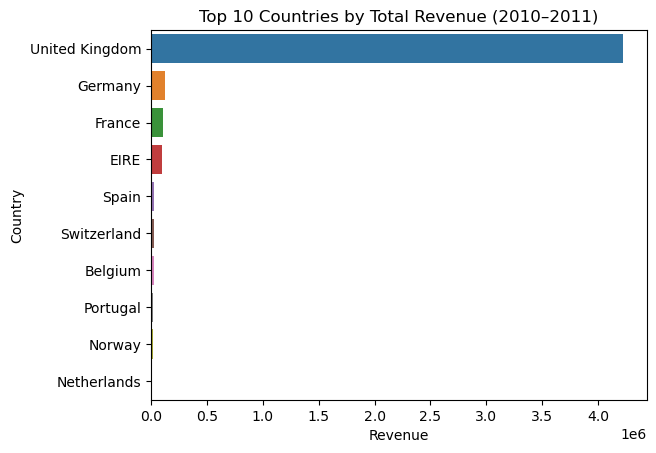

In [82]:
countryrev=countryrev.head(10)
sns.barplot(data=countryrev, y='Country', x='Revenue')
plt.title('Top 10 Countries by Total Revenue (2010–2011)')


### Key Insight:
#### The top 3 countries by revenue are typically the UK, Germany and France. The UK often dominates as it is where the business is based, but regional leaders may vary. Lower-revenue countries like Portugal, Norway and Netherlands may represent emerging markets or opportunities for expansion. Meanwhile, smaller markets represent potential areas for expansion, but require tailored go-to-market approaches due to their lower baseline performance.

### Drill Down: Revenue by Month in Top Countries (Seasonality by Country)

In [83]:
# country | revenue

topcountries = countryrev['Country'].head(3).to_list()
topcountriesonly = df_cleaned[df_cleaned['Country'].isin(topcountries)]
revbymonth = (topcountriesonly.groupby([topcountriesonly['InvoiceDate'].dt.to_period('M'),'Country'])
['Revenue'].sum().reset_index())
revbymonth.head(10)


,InvoiceDate,Country,Revenue
0,2010-12,France,5337.06
1,2010-12,Germany,6754.15
2,2010-12,United Kingdom,336840.45
3,2011-01,France,9293.75
4,2011-01,Germany,9586.19
5,2011-01,United Kingdom,252571.27
6,2011-02,France,5621.27
7,2011-02,Germany,4507.76
8,2011-02,United Kingdom,222086.21
9,2011-03,France,6034.45


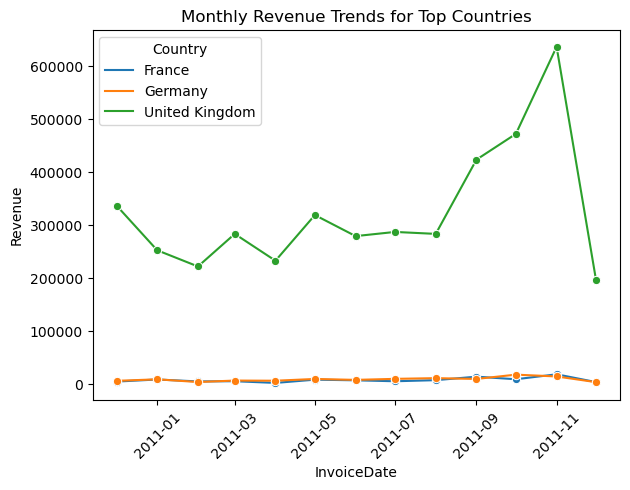

In [84]:
revbymonth['InvoiceDate'] = revbymonth['InvoiceDate'].dt.to_timestamp()
sns.lineplot(
    data=revbymonth,
    x='InvoiceDate', y='Revenue', hue='Country', marker='o'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Monthly Revenue Trends for Top Countries')
plt.show()

### Key Insight
#### The monthly revenue trends for the top countries (UK, Netherlands, and Germany) reveal clear seasonality, with significant revenue spikes in December—highlighting the business impact of the holiday shopping season. The UK consistently leads in revenue throughout the year, with Germany and the Netherlands showing steady but lower contributions. This pattern indicates that sales, marketing, and inventory strategies should be focused on the UK market and optimally timed to capitalize on predictable end-of-year peaks in demand, ensuring resources are allocated for maximum revenue impact.



### Top Products by Revenue

In [85]:
topproducts = df_cleaned.groupby('Description')['Revenue'].sum().sort_values(ascending = False).reset_index().rename(columns=
                                                                                                                    {'Description':'Product Name'})
topproducts.head(10)

,Product Name,Revenue
0,PARTY BUNTING,34024.68
1,WHITE HANGING HEART T-LIGHT HOLDER,33820.47
2,JUMBO BAG RED RETROSPOT,32060.26
3,JAM MAKING SET WITH JARS,23045.26
4,SPOTTY BUNTING,22550.20
5,DOORMAT KEEP CALM AND COME IN,20789.41
6,PAPER CHAIN KIT 50'S CHRISTMAS,20222.26
7,NATURAL SLATE HEART CHALKBOARD,20114.16
8,LUNCH BAG RED RETROSPOT,19581.68
9,ASSORTED COLOUR BIRD ORNAMENT,19194.62


#### The top 10 products contributed disproportionately to total sales—a clear opportunity for focused stocking and targeted marketing campaigns around these bestsellers.

## 2. Customer Segmentation
### Business Question: Which customer segments (e.g., top spenders, one-time buyers, loyal repeaters) contribute most to revenue? How can we better retain and upsell them?

In [86]:
df_customers = df_cleaned[~df_cleaned['CustomerID'].isnull()].copy()

### Calculate Recency, Frequency, and Monetary (RFM) for Each Customer

In [87]:
ref_date = df_customers['InvoiceDate'].max()
recency = (df_customers.groupby('CustomerID').agg({
    'InvoiceDate':lambda x: (ref_date-x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue':'sum'
}).reset_index().sort_values(by='Revenue', ascending=False).rename(columns={
    'InvoiceDate' :'Recency',
    'InvoiceNo' :'Frequency',
    'Revenue':'Monetary'
})
          )
recency.head()        

,CustomerID,Recency,Frequency,Monetary
1831,14911.0,0,234,75849.92
1254,14096.0,3,18,38289.06
3896,17841.0,1,165,31739.60
545,13089.0,3,98,27116.09
323,12748.0,0,200,19562.88


In [88]:
recency['Segments'] = pd.qcut(recency['Monetary'], 4, labels =['low', 'medium', 'high', 'VIP'])

recency.groupby('Segments')[['Recency', 'Frequency', 'Monetary']].mean()

,Recency,Frequency,Monetary
Segments,,,
low,151.344106,1.370722,99.508089
medium,117.721218,2.026641,294.868936
high,67.221694,3.780209,671.467403
VIP,31.170152,11.267110,2672.863936


### Key Insights
##### Recency: VIP customers bought most recently (average 31 days ago), while Low-value customers lapsed the longest (151 days since last purchase).
##### Frequency: VIPs placed about 11 orders on average—far more than others. Low-value customers bought only about once on average.
##### Monetary: VIP customers spent an average of £2,672.86, driving the bulk of revenue. Low-value customers spent under £100 on average.

#### Business implications:
VIP: Highly engaged and high-spending—ideal targets for loyalty programs, referrals, and premium upsell offers.  
High: Good customers with moderate engagement—nurture toward VIP with targeted promotions.  
Medium: Occasional purchasers—activate more frequently with seasonal deals.  
Low: Lapsed or one-time buyers—consider re-engagement campaigns (e.g., win-back emails, small incentives).

### Basic Cohort and Retention Analysis

In [89]:
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

firstmonth = df_cleaned.groupby('CustomerID')['InvoiceMonth'] \
    .min().reset_index().rename(columns={'InvoiceMonth':'CohortMonth'})

df_cleaned = df_cleaned.merge(firstmonth, on='CustomerID')

df_cleaned['PeriodNumber'] = (
    (df_cleaned['InvoiceMonth'].dt.year - df_cleaned['CohortMonth'].dt.year) * 12 +(df_cleaned['InvoiceMonth'].dt.month - df_cleaned['CohortMonth'].dt.month)
)

cohort_data = df_cleaned.groupby(['CohortMonth', 'PeriodNumber']).agg({
    'Revenue': 'sum',
    'CustomerID': 'nunique'
}).reset_index()

cohort_data['CohortMonth'] = cohort_data['CohortMonth'].astype(str)

cohort_data.head(10)


C:\Users\ameen\AppData\Local\Temp\ipykernel_10276\3840891177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')


,CohortMonth,PeriodNumber,Revenue,CustomerID
0,2010-12,0,252961.61,875
1,2010-12,1,103883.42,323
2,2010-12,2,87730.89,282
3,2010-12,3,111562.05,328
4,2010-12,4,90281.81,300
5,2010-12,5,125648.94,345
6,2010-12,6,109761.62,333
7,2010-12,7,104596.59,294
8,2010-12,8,112378.33,300
9,2010-12,9,146721.79,330


Text(120.72222222222221, 0.5, 'Cohort Month')

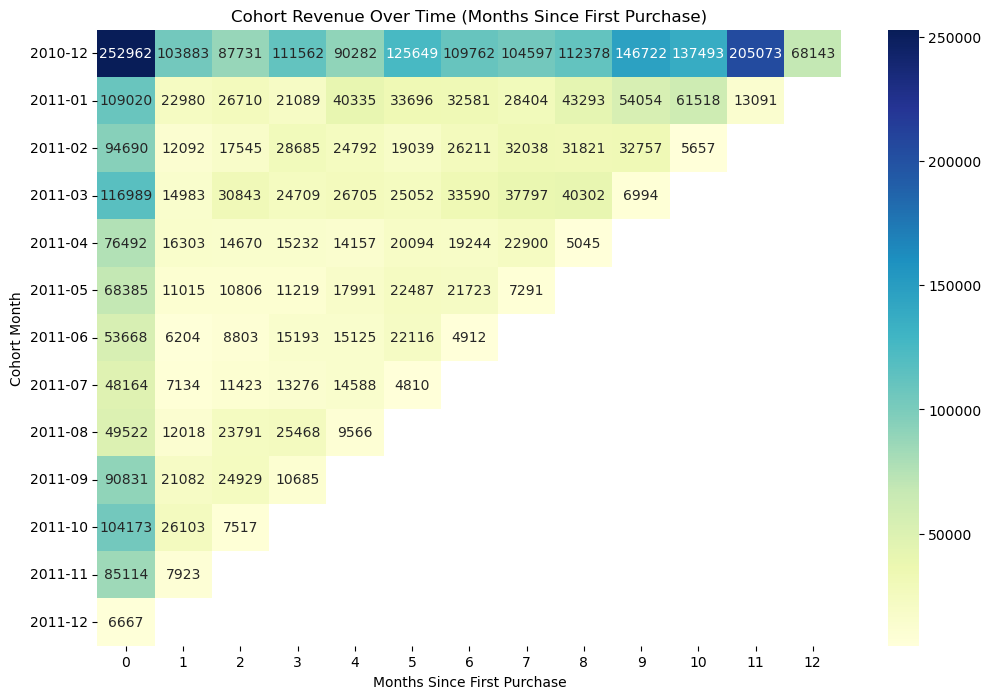

In [90]:
cohort_pivot_revenue = cohort_data.pivot(index='CohortMonth', columns='PeriodNumber', values='Revenue')

plt.figure(figsize=(12, 8))
sns.heatmap(
    cohort_pivot_revenue,
    annot=True,         # Annotate cells with revenue values
    fmt='.0f',          # No decimals
    cmap='YlGnBu'       # Blue-green color scale
)
plt.title('Cohort Revenue Over Time (Months Since First Purchase)')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')

#### Key Insights from Cohort Analysis
For almost every cohort, the darkest cell (and highest revenue) is at Month 0 (first month after joining). Revenue then declines sharply in later months. This is common in retail: new customers are most engaged right after joining, then many churn or decrease spending.

Later cohorts (e.g., 2011-10, 2011-11, 2011-12) start with smaller revenue compared to early ones—possibly fewer new customers, seasonality, or business changes.
#### Business Action to be Taken
Focus on Retention: Since most revenue happens in the customer’s first month, developing loyalty programs or post-purchase campaigns could significantly increase revenue from existing customers.  

Monitor Cohort Growth: Pay attention if revenue from new cohorts (recent rows) is declining—this could mean challenges in acquisition or external factors (e.g., market, product mix changes).  

Analyze Successful Cohorts: If a particular cohort maintains higher-than-normal spending, investigate what marketing, product, or service strategies were effective during their journey.

## Summary of Insights

- Revenue is heavily **concentrated in the UK**, with Germany and France as secondary markets; other countries show potential but contribute less currently.
- The business exhibits **strong seasonality**, with December as the peak month, emphasizing the need for aligned inventory and marketing efforts throughout the year.
- A small set of **top-selling products** and **VIP customers** account for the majority of revenue, highlighting opportunities for focused promotions and customer loyalty programs.
- Most customers make their largest purchase **in their first month**, with rapid decline afterward, underscoring the importance of retention and engagement strategies.
- **Anomaly detection and outlier removal** were critical to ensuring data quality, resulting in more reliable and actionable analyses.

---

## Business Recommendations

- Prioritize **retention efforts on new customers** to extend their lifetime value beyond the initial purchase period.
- Optimize marketing campaigns and resource allocation based on **seasonal revenue cycles**, with special emphasis on the December peak.
- Focus inventory management and promotional strategies around the **top products and the UK market** for maximum sales impact.
- Explore targeted growth initiatives for emerging international markets such as Germany and France.
- Implement ongoing **data validation and cleaning processes** to maintain data integrity and analytic accuracy.

---

## Limitations

- Approximately **25% of transaction records lack CustomerID**, which limits the depth of customer-level analyses such as segmentation and retention.
- The dataset covers **only one year**, constraining long-term trend and lifetime value assessments.
- Future analyses could benefit from integrating additional data sources or extending the timeframe.

---

## Conclusion

This project showcases a comprehensive analytics workflow—from data cleaning and exploratory analysis to customer segmentation and cohort-based retention studies—delivering actionable insights for business growth. The findings empower the company to better time inventory, target the most valuable markets and customers, and identify key areas for marketing investment. Future work could expand this foundation by incorporating predictive models or interactive dashboards to support real-time decision-making.

*Thank you for reviewing this project. Feel free to connect with me on LinkedIn or explore more of my work on GitHub.*
